# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob

# Download en_core_web_sm for text analytics

In [2]:
# import pandas as pd

## Main Function

Enter the path here : telco.csv
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 21 columns and 30 rows

DataFrame Succesfully imported

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Enter 'quit' to quit
What would you like to predict? : Churn
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : customerID
Key Spotted!
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3

No Columns removed
Would you like to remove any other ID,zip Code,Phone Numbers,UNIQUE lists, 
Or columns that have only one unique entr

Target Encoding Time taken : 0.4256589412689209

 #### FEATURE SELECTION ####
runnning classifier selector




The final score sheet of 9 selected columns with importances:

           col_name   scores2   t/f
13         Contract  0.467551  True
7   InternetService  0.195610  True
16     PhoneService  0.048174  True
9    OnlineSecurity  0.033357  True
0            tenure  0.024980  True
15    PaymentMethod  0.024613  True
11      TechSupport  0.023844  True
1    MonthlyCharges  0.022553  True
6   StreamingMovies  0.021359  True

9 columns are eliminated during Feature Selection which are:
{'StreamingTV', 'Dependents', 'SeniorCitizen', 'gender', 'Partner', 'PaperlessBilling', 'MultipleLines', 'OnlineBackup', 'DeviceProtection'}
Feature Selection Time taken : 1.5245459079742432


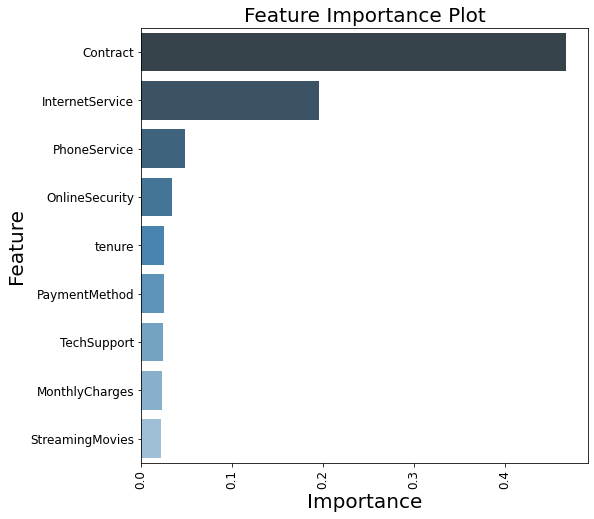

Feature Selection Plot Time taken : 0.2823159694671631

 #### DECISION TREE VISUALIZATION ####
#### VISUALIZATION DID NOT RUN AND HAD ERRORS ####

 #### Printing Sample Equation of the DATA ####
LABEL ENCODED FOR SAMPLE EQUATION

LogisticRegression Equation = -0.0253338300914453*tenure + 0.023974150352625335*MonthlyCharges + 0.06820646842725042*StreamingMovies + 0.012453554126145055*InternetService + -0.30078535407428825*OnlineSecurity + -0.3101344129874863*TechSupport + -0.9192962431295513*Contract + 0.1166463950541605*PaymentMethod + -0.43898573488309434

Probability(Y=1) = exp(Power term)/(exp(Power term) + 1)


WHERE, the encoded information is as follows : 

       StreamingMovies  StreamingMovies encoded info InternetService  \
0                   no                             0             dsl   
1  no internet service                             1     fiber optic   
2                  yes                             2              no   

   InternetService encoded info       O



 #### TRANSFORMATION AND PREDICTION ####
num_df - (771, 2)
disc_df - (771, 16)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['tenure', 'MonthlyCharges', 'StreamingMovies', 'InternetService',
       'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod',
       'PhoneService'],
      dtype='object')
tenure             float64
MonthlyCharges     float64
StreamingMovies    float64
InternetService    float64
OnlineSecurity     float64
TechSupport        float64
Contract           float64
PaymentMethod      float64
PhoneService       float64
dtype: object


      tenure  MonthlyCharges  StreamingMovies  InternetService  \
0   0.129671        0.812818         0.616247         1.000000   
1   0.600230        0.452940         1.000000         0.333703   
2   0.909250        0.966147         0.616247         1.000000   
3   0.307700        0.650686         1.000000         1.000000 

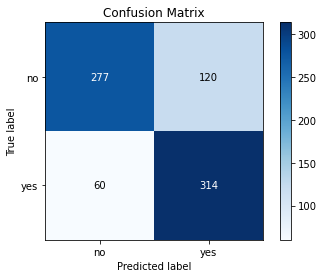

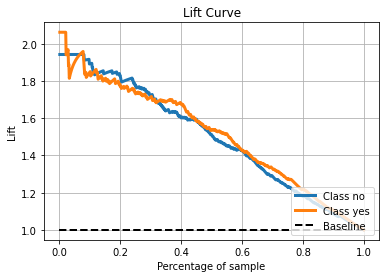

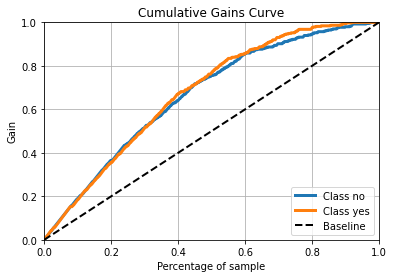

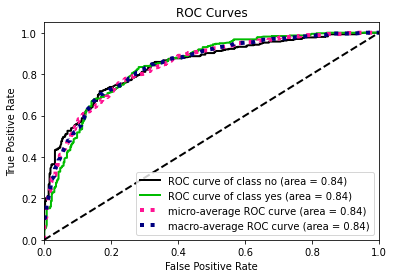

In [3]:
from userInputs import *
from INIT import *
from score import *
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')

def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        df,csvPath = importFile(path,nrows=30)
        df = dataHandler(df) # If first few rows contains unnecessary info
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nQuitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = dataHandler(df) # If first few rows contains unnecessary info
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                init_info,validation = INIT(df,info)
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))

if __name__ == '__main__':
    # Main Function call
    main()

In [4]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)
pre

,customerID,Actual Values,Predicted Values,Class yes Probabilities,Class no Probabilities
1,2472-OVKUP,yes,yes,0.159349,0.840651
2,2930-UOTMB,yes,no,0.852605,0.147395
3,8384-FZBJK,no,yes,0.193246,0.806754
4,8544-GOQSH,no,yes,0.413468,0.586532
5,3870-SPZSI,no,no,0.842323,0.157677
...,...,...,...,...,...
96,4389-UEFCZ,no,no,0.785163,0.214837
97,2860-RANUS,yes,yes,0.347435,0.652565
98,5510-BOIUJ,yes,yes,0.436786,0.563214
99,0929-HYQEW,no,yes,0.452013,0.547987


In [5]:
MC = pd.read_csv('MC.csv')
if 'F1' in MC.columns:print('Sorted by F1 Score(F1),higher the better')
else:print('Sorted by Root Mean Squared Error(RMSE),lower the better')
MC.index = np.arange(1,len(MC)+1)
MC

Sorted by F1 Score(F1),higher the better


,Name,Accuracy%,Precision,Recall,F1,ROC_AUC_score,Kappa,MCC,KS_statistic,KS_p-value,Total time(mins)
1,CatBoost,76.87%,0.723502,0.839572,0.777228,0.768653,0.534820,0.541368,0.077821,1.872674e-02,0.335582
2,Logistic Regression,77.04%,0.737864,0.812834,0.773537,0.770397,0.539207,0.541835,0.049287,3.063901e-01,0.000380
3,XGBoost,77.39%,0.773022,0.773022,0.773022,0.773865,0.546588,0.547930,0.035019,7.321552e-01,0.003400
4,Ensemble (Light GBM+Random Forest+Extra Trees ...,76.50%,0.735294,0.802139,0.767263,0.765049,0.528706,0.530768,0.044099,4.418188e-01,0.050931
5,Light GBM,76.25%,0.732843,0.799465,0.764706,0.762453,0.523527,0.525568,0.044099,4.418188e-01,0.002077
6,Naive Bayes(Bayesisan Statistics),74.14%,0.698851,0.812834,0.751545,0.741430,0.480589,0.486673,0.079118,1.600327e-02,0.000117
7,Neural Network,73.53%,0.689189,0.818182,0.748166,0.735287,0.468037,0.475877,0.090791,3.458713e-03,0.042478
8,Random Forest,73.85%,0.719388,0.754011,0.736292,0.738466,0.476269,0.476788,0.023346,9.846988e-01,0.008870
9,Extra Trees Classifier,72.56%,0.705584,0.743316,0.723958,0.725562,0.450426,0.451033,0.025940,9.578713e-01,0.008633
10,Support Vector Machine,59.41%,0.537791,0.989305,0.696798,0.594149,0.183827,0.303628,0.407263,1.429797e-57,0.012570


In [6]:
# joblib.load('XT').min().min()

In [7]:
# joblib.load('Xt').min().min()

In [8]:
# joblib.load('XT').max().max()

In [9]:
# joblib.load('Xt').max().max()

In [10]:
# joblib.load('YT').max()

In [11]:
# joblib.load('Yt').max()

In [12]:
# joblib.load('YT').min()

In [13]:
# joblib.load('Yt').min()

In [14]:
# import pandas as pd
# df = pd.read_csv('SheetSheetSheet.csv')

In [15]:
# df

In [16]:
# d = pd.read_excel('cust.xlsx',nrows=5)

In [17]:
# d